In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [4]:
import importlib
import utils
importlib.reload(utils)  # Reload the utils module to ensure we have the latest version 
from utils import *

# Data Exploration

In [5]:
data = pd.read_csv('hand_landmarks_data.csv')
data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [6]:
print(data.shape)
print(data.label.nunique())
print(data.label.value_counts())

(25675, 64)
18
label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64


In [5]:
data.isna().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

In [7]:
import importlib
import utils
importlib.reload(utils)  # Reload the utils module to ensure we have the latest version 
from utils import *

In [6]:
print(data.shape)
X = data.drop('label', axis=1)
y = data['label']

(25675, 64)


In [7]:
new_X = preprocess_data(X.values)
print(new_X.shape)

(25675, 42)


In [8]:

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

Training set: (16432, 42), Validation set: (4108, 42), Test set: (5135, 42)


In [10]:
type(new_X)

numpy.ndarray

In [11]:
y_train.iloc[1]

'two_up'

In [55]:
y_train.nunique()

18

In [19]:
import importlib
import utils
importlib.reload(utils)  # Reload the utils module to ensure we have the latest version of the plot_hand_gesture function
from utils import *

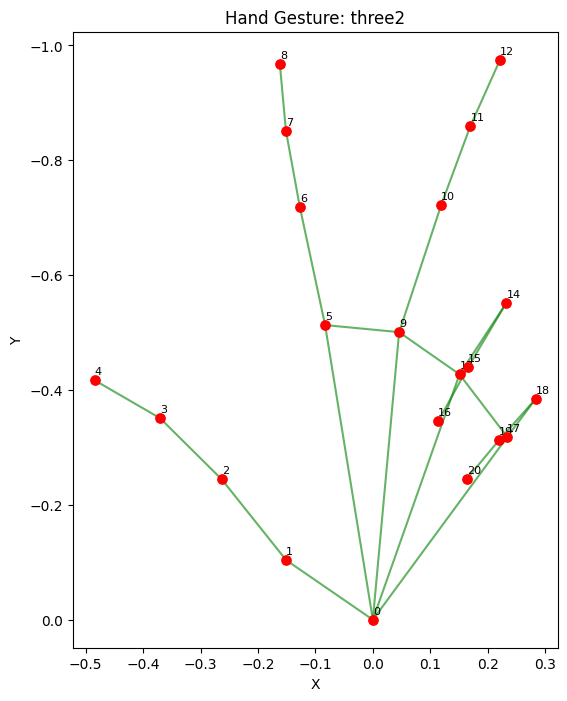

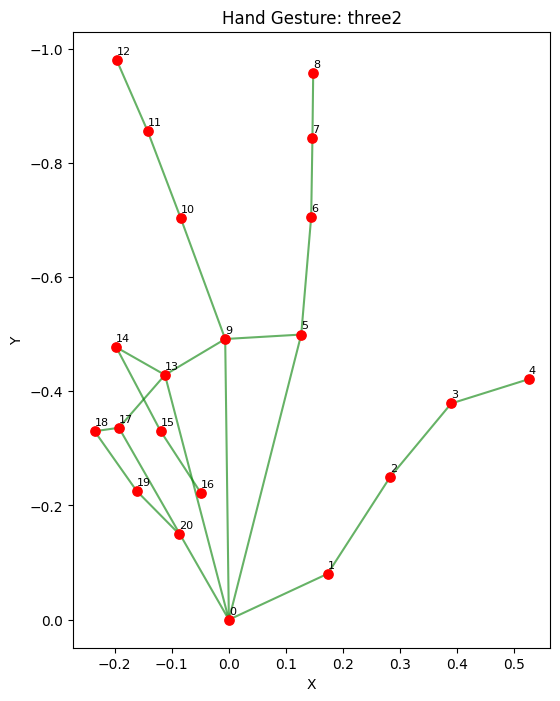

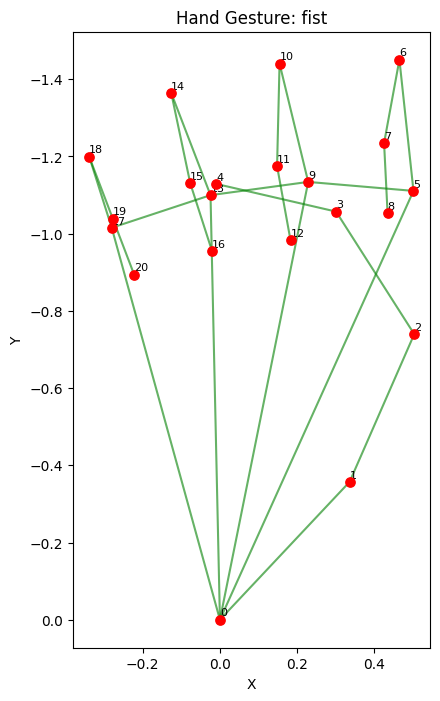

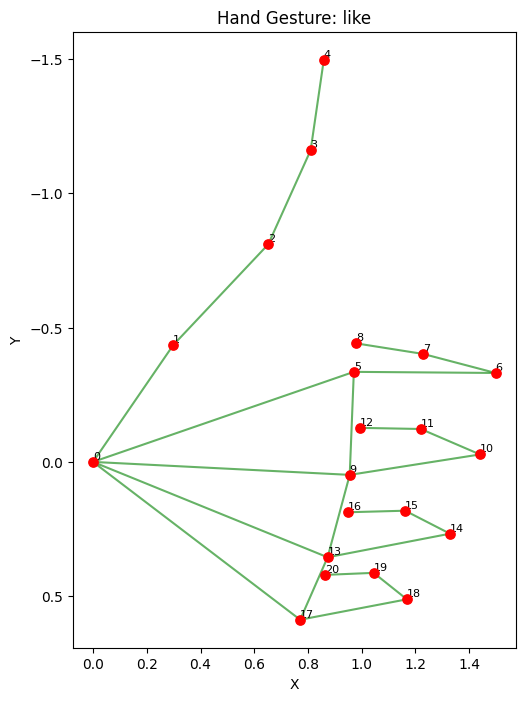

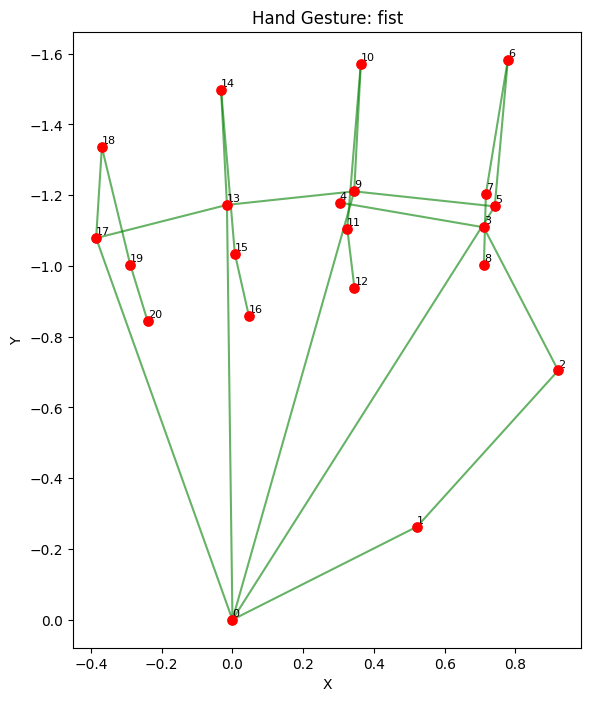

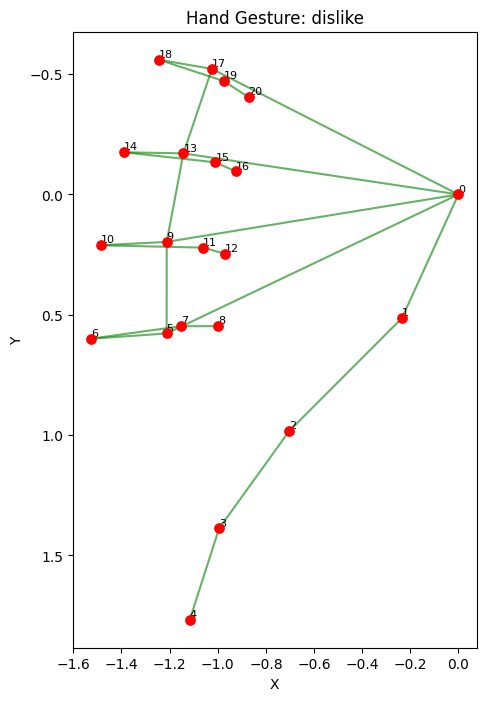

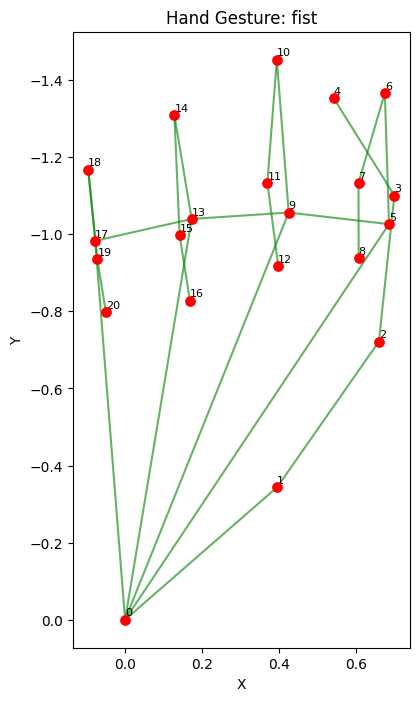

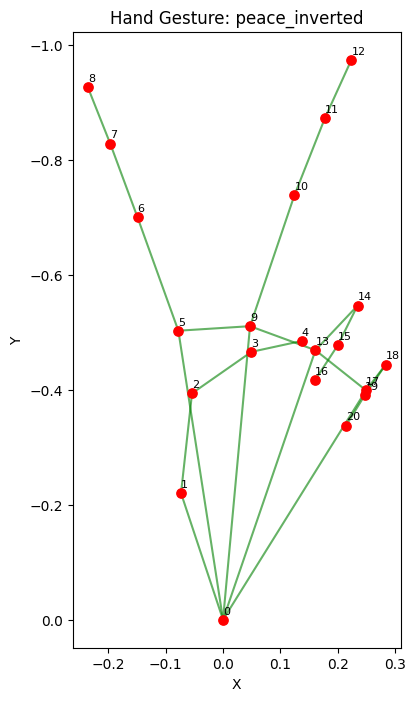

In [20]:
plot_random_hand_gestures(X_train, y_train, num_samples=8)

# Model Training:

In [21]:
import importlib
importlib.reload(utils)  # Reload the utils module to ensure we have the latest version of the plot_hand_gesture function
from utils import encode_labels

In [9]:
# Encode labels for train, test, val sets
y_encoded_train, label_encoder = encode_labels(y_train)
y_encoded_test, _ = encode_labels(y_test)
y_encoded_val, _ = encode_labels(y_val)

print("Encoded labels:")
print(f"Classes: {label_encoder.classes_}")
print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}, Val set shape: {X_val.shape}")
print(f"Number of classes: {len(label_encoder.classes_)}\n")

Encoded labels:
Classes: ['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']
Train set shape: (16432, 42), Test set shape: (5135, 42), Val set shape: (4108, 42)
Number of classes: 18



## KNN Classifier:

In [10]:
print("=" * 50)
print("KNN CLASSIFIER (k=5)")
print("=" * 50)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_encoded_train)


y_pred_knn_train = knn.predict(X_train)
y_pred_knn_val = knn.predict(X_val)

knn_val_acc = accuracy_score(y_encoded_val, y_pred_knn_val)
knn_val_prec = precision_score(y_encoded_val, y_pred_knn_val, average='weighted')
knn_val_rec = recall_score(y_encoded_val, y_pred_knn_val, average='weighted')
knn_val_f1 = f1_score(y_encoded_val, y_pred_knn_val, average='weighted')

print("\nKNN - Train Set:")
print(f"  Accuracy:  {accuracy_score(y_encoded_train, y_pred_knn_train):.4f}")
print(f"  Precision: {precision_score(y_encoded_train, y_pred_knn_train, average='weighted'):.4f}")
print(f"  Recall:    {recall_score(y_encoded_train, y_pred_knn_train, average='weighted'):.4f}")
print(f"  F1 Score:  {f1_score(y_encoded_train, y_pred_knn_train, average='weighted'):.4f}")

print("\nKNN - Validation Set:")
print(f"  Accuracy:  {knn_val_acc:.4f}")
print(f"  Precision: {knn_val_prec:.4f}")
print(f"  Recall:    {knn_val_rec:.4f}")
print(f"  F1 Score:  {knn_val_f1:.4f}")

KNN CLASSIFIER (k=5)

KNN - Train Set:
  Accuracy:  0.9808
  Precision: 0.9809
  Recall:    0.9808
  F1 Score:  0.9808

KNN - Validation Set:
  Accuracy:  0.9742
  Precision: 0.9748
  Recall:    0.9742
  F1 Score:  0.9743


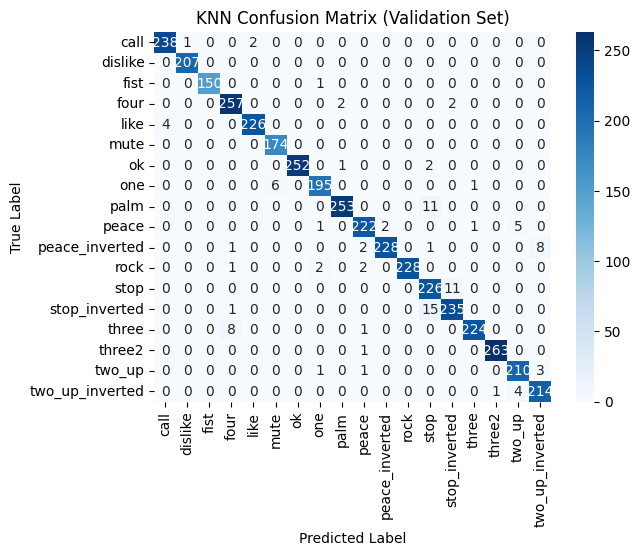

In [13]:
cm_knn = confusion_matrix(y_encoded_val, y_pred_knn_val)

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("./confusion_matrix_KNN.png")

## SVC Classifier:

In [14]:

print("\n" + "=" * 50)
print("SVC CLASSIFIER (RBF kernel)")
print("=" * 50)
svc = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svc.fit(X_train, y_encoded_train)

y_pred_svc_train = svc.predict(X_train)
y_pred_svc_val = svc.predict(X_val)

svc_val_acc = accuracy_score(y_encoded_val, y_pred_svc_val)
svc_val_prec = precision_score(y_encoded_val, y_pred_svc_val, average='weighted')
svc_val_rec = recall_score(y_encoded_val, y_pred_svc_val, average='weighted')
svc_val_f1 = f1_score(y_encoded_val, y_pred_svc_val, average='weighted')

print("\nSVC - Train Set:")
print(f"  Accuracy:  {accuracy_score(y_encoded_train, y_pred_svc_train):.4f}")
print(f"  Precision: {precision_score(y_encoded_train, y_pred_svc_train, average='weighted'):.4f}")
print(f"  Recall:    {recall_score(y_encoded_train, y_pred_svc_train, average='weighted'):.4f}")
print(f"  F1 Score:  {f1_score(y_encoded_train, y_pred_svc_train, average='weighted'):.4f}")

print("\nSVC - Validation Set:")
print(f"  Accuracy:  {svc_val_acc:.4f}")
print(f"  Precision: {svc_val_prec:.4f}")
print(f"  Recall:    {svc_val_rec:.4f}")
print(f"  F1 Score:  {svc_val_f1:.4f}")


SVC CLASSIFIER (RBF kernel)

SVC - Train Set:
  Accuracy:  0.9779
  Precision: 0.9783
  Recall:    0.9779
  F1 Score:  0.9780

SVC - Validation Set:
  Accuracy:  0.9771
  Precision: 0.9777
  Recall:    0.9771
  F1 Score:  0.9772


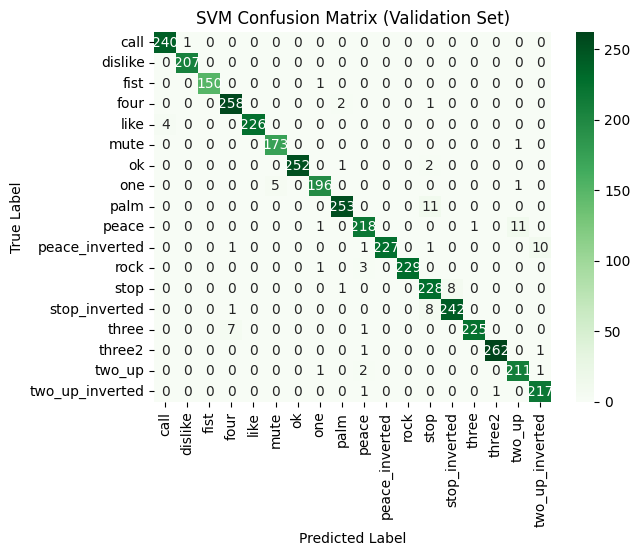

In [16]:
cm_svc = confusion_matrix(y_encoded_val, y_pred_svc_val)

sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("./confusion_matrix_SVC.png")

## RandomForest Classifier:

In [17]:
print("\n" + "=" * 50)
print("RANDOM FOREST CLASSIFIER (100 estimators)")
print("=" * 50)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_encoded_train)

# Predictions
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_val = rf.predict(X_val)

rf_val_acc = accuracy_score(y_encoded_val, y_pred_rf_val)
rf_val_prec = precision_score(y_encoded_val, y_pred_rf_val, average='weighted')     
rf_val_rec = recall_score(y_encoded_val, y_pred_rf_val, average='weighted')
rf_val_f1 = f1_score(y_encoded_val, y_pred_rf_val, average='weighted')

# Metrics
print("\nRandom Forest - Train Set:")
print(f"  Accuracy:  {accuracy_score(y_encoded_train, y_pred_rf_train):.4f}")
print(f"  Precision: {precision_score(y_encoded_train, y_pred_rf_train, average='weighted'):.4f}")
print(f"  Recall:    {recall_score(y_encoded_train, y_pred_rf_train, average='weighted'):.4f}")
print(f"  F1 Score:  {f1_score(y_encoded_train, y_pred_rf_train, average='weighted'):.4f}")

print("\nRandom Forest - Validation Set:")
print(f"  Accuracy:  {rf_val_acc:.4f}")
print(f"  Precision: {rf_val_prec:.4f}")
print(f"  Recall:    {rf_val_rec:.4f}")
print(f"  F1 Score:  {rf_val_f1:.4f}")


RANDOM FOREST CLASSIFIER (100 estimators)

Random Forest - Train Set:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1 Score:  1.0000

Random Forest - Validation Set:
  Accuracy:  0.9769
  Precision: 0.9773
  Recall:    0.9769
  F1 Score:  0.9770


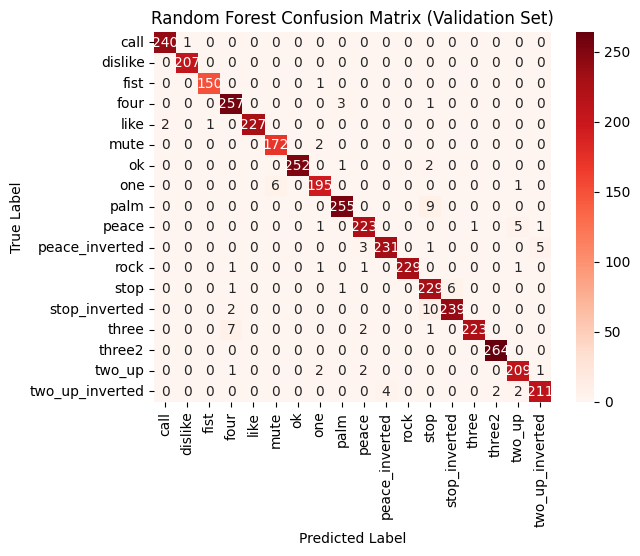

In [18]:
cm_rf = confusion_matrix(y_encoded_val, y_pred_rf_val)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("./confusion_matrix_RandomForest.png")

## Gradient Boost Classifier:

In [19]:
# ===== Gradient Boosting Classifier =====
print("=" * 50)
print("GRADIENT BOOSTING CLASSIFIER (100 estimators)")
print("=" * 50)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_encoded_train)

# Predictions
y_pred_gb_train = gb.predict(X_train)
y_pred_gb_val = gb.predict(X_val)

gb_val_acc = accuracy_score(y_encoded_val, y_pred_gb_val)
gb_val_prec = precision_score(y_encoded_val, y_pred_gb_val, average='weighted')
gb_val_rec = recall_score(y_encoded_val, y_pred_gb_val, average='weighted')
gb_val_f1 = f1_score(y_encoded_val, y_pred_gb_val, average='weighted')

# Metrics
print("\nGradient Boosting - Train Set:")
print(f"  Accuracy:  {accuracy_score(y_encoded_train, y_pred_gb_train):.4f}")
print(f"  Precision: {precision_score(y_encoded_train, y_pred_gb_train, average='weighted'):.4f}")
print(f"  Recall:    {recall_score(y_encoded_train, y_pred_gb_train, average='weighted'):.4f}")
print(f"  F1 Score:  {f1_score(y_encoded_train, y_pred_gb_train, average='weighted'):.4f}")

print("\nGradient Boosting - Validation Set:")
print(f"  Accuracy:  {gb_val_acc:.4f}")
print(f"  Precision: {gb_val_prec:.4f}")
print(f"  Recall:    {gb_val_rec:.4f}")
print(f"  F1 Score:  {gb_val_f1:.4f}")

GRADIENT BOOSTING CLASSIFIER (100 estimators)

Gradient Boosting - Train Set:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1 Score:  1.0000

Gradient Boosting - Validation Set:
  Accuracy:  0.9771
  Precision: 0.9775
  Recall:    0.9771
  F1 Score:  0.9772


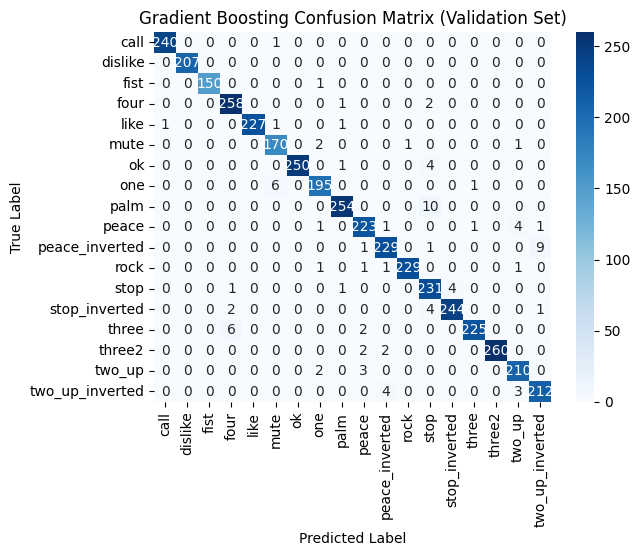

In [20]:
cm_gb = confusion_matrix(y_encoded_val, y_pred_gb_val)

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Gradient Boosting Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig("./confusion_matrix_GradientBoosting.png")

            Model  Accuracy  Precision   Recall  F1 Score
              KNN  0.974197   0.974802 0.974197  0.974323
              SVC  0.977118   0.977683 0.977118  0.977208
    Random Forest  0.976874   0.977308 0.976874  0.976961
Gradient Boosting  0.977118   0.977537 0.977118  0.977217


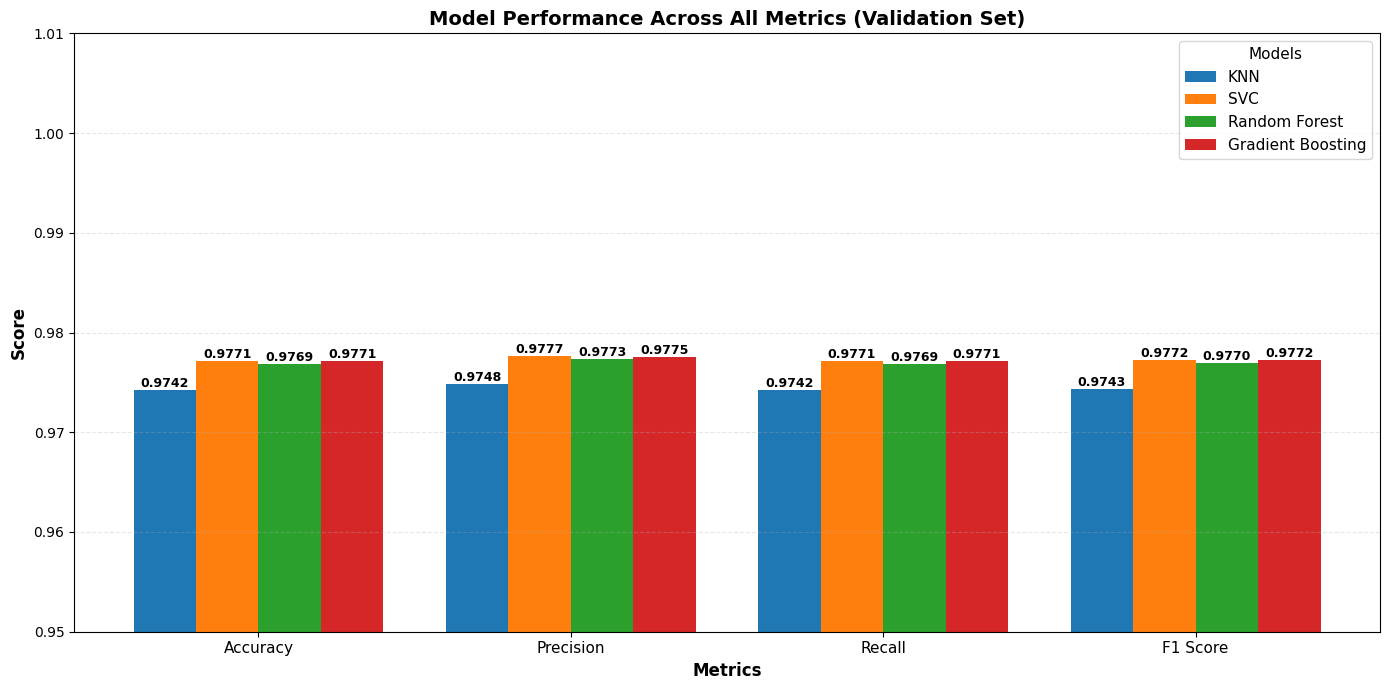

In [31]:
# Create comparison dataframe
comparison_data_final = {
    'Model': ['KNN', 'SVC', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [knn_val_acc, svc_val_acc, rf_val_acc, gb_val_acc],
    'Precision': [knn_val_prec, svc_val_prec, rf_val_prec, gb_val_prec],
    'Recall': [knn_val_rec, svc_val_rec, rf_val_rec, gb_val_rec],
    'F1 Score': [knn_val_f1, svc_val_f1, rf_val_f1, gb_val_f1]
}

comparison_df_final = pd.DataFrame(comparison_data_final)
print(comparison_df_final.to_string(index=False))

# Create grouped bar chart on same plot
fig, ax = plt.subplots(figsize=(14, 7))

# Data setup
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = comparison_df_final['Model'].values
x = np.arange(len(metrics))
width = 0.2

# Model colors
model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create grouped bars for each model
for i, model in enumerate(models):
    values = [comparison_df_final.loc[i, metric] for metric in metrics]
    offset = width * (i - 1.5)
    bars = ax.bar(x + offset, values, width, label=model, color=model_colors[i])
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Customize the chart
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Across All Metrics (Validation Set)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11, loc='upper right', title='Models', title_fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim([0.95, 1.01])

plt.tight_layout()
plt.savefig("./models_artifacts/comparison_grouped_bar_chart.png")
